#Near earth objects - API exercise
Raj Prasad
July 2019

[html version](https://daddyprasad5.github.io/near_earth.html) - with all the code hidden away for a quick read

[jupyter notebook version](https://github.com/daddyprasad5/thinkful/blob/master/near_earth.ipynb) - with all the code exposed in an interactive notebook

The goal of this exercise is to collect data via an API, exploring these concerns: 
* the requests module
* authentication
* pagination
* rate limits
* loading a dataframe from json
* creating information from the data

In [45]:
#imports
import requests
import pandas as pd

In [37]:
#a generator that uses the requests module to yield the next page of near earth object records, 
#and it will continue until there are no more.


def get_neo_page():
    #note I've deleted my API key from the next_URI variable before posting this page to github
    next_URI = "https://api.nasa.gov/neo/rest/v1/neo/browse?api_key=<add your key here>"
    while True:
        response = requests.get(next_URI)
        print(response)
        data = response.json()
        print(len(data))
        yield data["near_earth_objects"]
        next_URI =  data["links"]["next"]
        print(next_URI)

#a function that collects a given number of pages pages of near earth object records

def get_neos(pages):
    
    neos = []
    neo_getter = get_neo_page()
    for page in range(pages): 
        neos.extend(next(neo_getter))
        
    return neos
    

In [116]:
#there are 1067 pages, and the rate limit is 1000 requests per hour
#I'll split this into two separate sequences of API calls and will
#run them manually an hour apart. 

max_pages = 1067

neos = get_neos(500)

<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=1&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=2&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=3&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=4&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=5&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=6&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=7&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=8&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigC

<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=66&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=67&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=68&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=69&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=70&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=71&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=72&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=73&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdm

<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=131&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=132&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=133&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=134&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=135&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=136&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=137&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=138&size=20&api_key=NS1PLBwh7SQQmGyDR

<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=196&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=197&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=198&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=199&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=200&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=201&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=202&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=203&size=20&api_key=NS1PLBwh7SQQmGyDR

<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=261&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=262&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=263&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=264&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=265&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=266&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=267&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=268&size=20&api_key=NS1PLBwh7SQQmGyDR

<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=326&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=327&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=328&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=329&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=330&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=331&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=332&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=333&size=20&api_key=NS1PLBwh7SQQmGyDR

<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=391&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=392&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=393&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=394&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=395&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=396&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=397&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=398&size=20&api_key=NS1PLBwh7SQQmGyDR

<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=456&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=457&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=458&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=459&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=460&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=461&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=462&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=463&size=20&api_key=NS1PLBwh7SQQmGyDR

In [132]:
#second call to get the rest of the pages

neos.extend(get_neos(max_pages - 500))

<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=1&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=2&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=3&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=4&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=5&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=6&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=7&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=8&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigC

<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=67&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=68&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=69&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=70&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=71&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=72&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=73&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=74&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdm

<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=132&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=133&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=134&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=135&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=136&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=137&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=138&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=139&size=20&api_key=NS1PLBwh7SQQmGyDR

<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=197&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=198&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=199&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=200&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=201&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=202&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=203&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=204&size=20&api_key=NS1PLBwh7SQQmGyDR

<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=262&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=263&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=264&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=265&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=266&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=267&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=268&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=269&size=20&api_key=NS1PLBwh7SQQmGyDR

<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=327&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=328&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=329&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=330&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=331&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=332&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=333&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=334&size=20&api_key=NS1PLBwh7SQQmGyDR

<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=392&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=393&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=394&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=395&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=396&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=397&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=398&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=399&size=20&api_key=NS1PLBwh7SQQmGyDR

<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=457&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=458&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=459&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=460&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=461&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=462&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=463&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=464&size=20&api_key=NS1PLBwh7SQQmGyDR

<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=522&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=523&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=524&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=525&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=526&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=527&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=528&size=20&api_key=NS1PLBwh7SQQmGyDRmqtgTPdmfLhkTigCdSPuAyS
<Response [200]>
3
http://www.neowsapp.com/rest/v1/neo/browse?page=529&size=20&api_key=NS1PLBwh7SQQmGyDR

In [118]:
#create a dataframe from the json

neos_df = pd.DataFrame.from_dict(neos, orient="columns")
neos_df.head()

,absolute_magnitude_h,close_approach_data,designation,estimated_diameter,id,is_potentially_hazardous_asteroid,is_sentry_object,links,name,name_limited,nasa_jpl_url,neo_reference_id,orbital_data
0,16.1,"[{'close_approach_date': '1945-06-07', 'close_...",21277,{'kilometers': {'estimated_diameter_min': 1.60...,2021277,False,False,{'self': 'http://www.neowsapp.com/rest/v1/neo/...,21277 (1996 TO5),NaN,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2021277,2021277,"{'orbit_id': '160', 'orbit_determination_date'..."
1,16.6,[],162038,{'kilometers': {'estimated_diameter_min': 1.27...,2162038,False,False,{'self': 'http://www.neowsapp.com/rest/v1/neo/...,162038 (1996 DH),NaN,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2162038,2162038,"{'orbit_id': '212', 'orbit_determination_date'..."
2,16.5,[],189058,{'kilometers': {'estimated_diameter_min': 1.33...,2189058,False,False,{'self': 'http://www.neowsapp.com/rest/v1/neo/...,189058 (2000 UT16),NaN,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2189058,2189058,"{'orbit_id': '130', 'orbit_determination_date'..."
3,17.2,[],276274,{'kilometers': {'estimated_diameter_min': 0.96...,2276274,False,False,{'self': 'http://www.neowsapp.com/rest/v1/neo/...,276274 (2002 SS41),NaN,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2276274,2276274,"{'orbit_id': '98', 'orbit_determination_date':..."
4,16.7,[],322913,{'kilometers': {'estimated_diameter_min': 1.21...,2322913,False,False,{'self': 'http://www.neowsapp.com/rest/v1/neo/...,322913 (2002 CM1),NaN,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2322913,2322913,"{'orbit_id': '47', 'orbit_determination_date':..."


In [148]:
#create a dataframe of all close approaches.  
#This "flattens" the nested json structure of many approaches per near earth object
#columns are "id", "name", "estimated_diameter" / "miles", "close_approach_date" (year), 
#"miss_distance" / "miles", relative_velocity

potentially_hazardous, ids, names, estimated_diameters, close_approach_years, miss_distances, relative_velocities = [[] for i in range(7)]

for i, neo in neos_df.iterrows():
    for cad in neo.close_approach_data:
        ids.append(neo["id"])
        names.append(neo["name"])
        relative_velocities.append(float(cad["relative_velocity"]["miles_per_hour"]))
        est_diam_min = float(neo["estimated_diameter"]["miles"]["estimated_diameter_min"])
        est_diam_max = float(neo["estimated_diameter"]["miles"]["estimated_diameter_max"])
        estimated_diameters.append((est_diam_min + est_diam_max)/2)
        miss_distances.append(float(cad["miss_distance"]["miles"]))
        close_approach_years.append(int(cad["close_approach_date"][0:4]))
        potentially_hazardous.append(bool(neo["is_potentially_hazardous_asteroid"]))
        

cad_df = pd.DataFrame({"id": ids, "name":names, 
                       "estimated_diameter":estimated_diameters, 
                       "close_approach_year": close_approach_years,
                       "miss_distance":miss_distances, 
                       "relative_velocity":relative_velocities,
                      "potentially_hazardous" : potentially_hazardous})




In [149]:
cad_df.head()

,id,name,estimated_diameter,close_approach_year,miss_distance,relative_velocity,potentially_hazardous
0,2021277,21277 (1996 TO5),1.610251,1945,3.106912e+06,34693.145016,False
1,3012393,(1979 XB),0.509206,1979,3.401319e+06,51507.858746,True
2,3092102,(1990 UN),0.053320,1990,3.915948e+06,27014.352039,False
3,3092109,(1991 XA),0.048629,1991,5.470480e+06,22750.465802,False
4,3092112,(1992 YD3),0.014025,1992,2.830522e+06,32945.513351,False


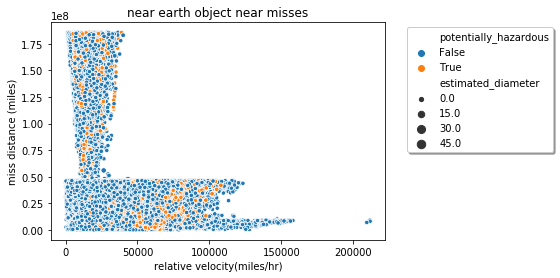

In [152]:
#create a scatterplot of close approaches, with x being year, 
#y being earth proximity, hue being speed, and size being asteroid size
#it would be really cool if the data point could link to the jpl page for
#the asteroid.

#d3js can do links of markets - may not integrate with jupyter

import seaborn as sns
import matplotlib.pyplot as plt

data = cad_df
#data=cad_df[(cad_df.close_approach_year > 1960)
#                             & (cad_df.close_approach_year < 2000) 
#                             & (cad_df.miss_distance <  0.5e8)]

ax = sns.scatterplot(x="relative_velocity", y="miss_distance",
                     hue="potentially_hazardous", 
                     size="estimated_diameter",
                     data= data)
plt.xlabel('relative velocity(miles/hr)')
plt.ylabel('miss distance (miles)')
plt.title('near earth object near misses')
#plt.legend(bbox_to_anchor=(1, 1, 0.25, 0.25))
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1),shadow=True, ncol=1)


Readability Notes: 
* a bottom, right, large marker would be the "closest" of past misses - superfast, large objects that passed very close to earth.
* the hue indicates future risk - which takes into account projected, future encounters only.  
* the data includes both past observations and future projected encounters

Observations: 
* Interesting that high velocity misses seem to cap at a miss distance of 500 million miles.  I wonder if that's related to our ability to detect fast-moving objects further away from earth.  
* The set of closest past misses (high velocity, close to earth) don't seem to have any future high risk objects.  
* There seems to be a dirth of high-risk objects that in the past came close (less than 500M miles) at low speed (less than 50k mph)